# Support Vector Machines

In [4]:
from sklearn import svm
from sklearn.svm import SVC
import numpy as np
import matplotlib.pyplot as plt

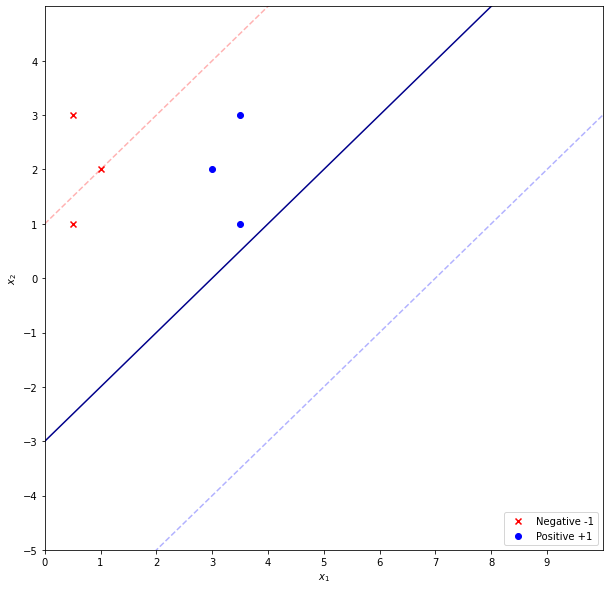

In [13]:
#Data set
x_neg = np.array([[.5,1],[1,2],[.5,3]])
y_neg = np.array([-1,-1,-1])
x_pos = np.array([[3,2],[3.5,1],[3.5,3]])
y_pos = np.array([1,1,1])
x1 = np.linspace(-10,10)
x = np.vstack((np.linspace(-10,10),np.linspace(-10,10)))

No handles with labels found to put in legend.


[-1 -1 -1  1  1  1]


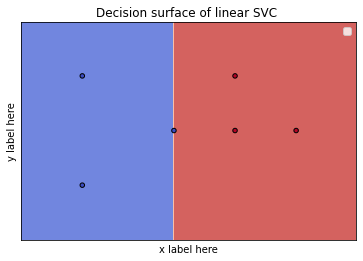

In [30]:
from sklearn.svm import SVC
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, datasets
iris = datasets.load_iris()
X = np.array([[.5,3],[.5,1],[2,2],[3,3],[3,2],[4,2]])  # we only take the first two features.
y = np.array([-1,-1,-1,1,1,1])
print(y)
def make_meshgrid(x, y, h=.02):
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    return xx, yy

def plot_contours(ax, clf, xx, yy, **params):
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out

model = svm.SVC(kernel='linear')
clf = model.fit(X, y)

fig, ax = plt.subplots()
# title for the plots
title = 'Decision surface of linear SVC '
# Set-up grid for plotting.
X0, X1 = X[:, 0], X[:, 1]
xx, yy = make_meshgrid(X0, X1)

plot_contours(ax, clf, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
ax.set_ylabel('y label here')
ax.set_xlabel('x label here')
ax.set_xticks(())
ax.set_yticks(())
ax.set_title(title)
ax.legend()
plt.show()

<ipython-input-33-eac43d3649c9>:13: RuntimeWarning: divide by zero encountered in double_scalars
  a = -w[0] / w[1]
<ipython-input-33-eac43d3649c9>:15: RuntimeWarning: divide by zero encountered in double_scalars
  yy = a * xx - (clf.intercept_[0]) / w[1]
<ipython-input-33-eac43d3649c9>:15: RuntimeWarning: invalid value encountered in subtract
  yy = a * xx - (clf.intercept_[0]) / w[1]
<ipython-input-33-eac43d3649c9>:17: RuntimeWarning: invalid value encountered in subtract
  yy_down = yy- np.sqrt(1 + a ** 2) * margin


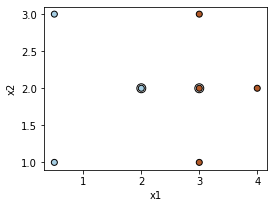

In [33]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
np.random.seed(2)
# we create 40 linearly separable points
X = np.array([[.5,3],[.5,1],[2,2],[3,3],[3,2],[4,2], [3,1]])  # we only take the first two features.
Y = np.array([-1,-1,-1,1,1,1,1])
# fit the model
clf = svm.SVC(kernel='linear', C=1)
clf.fit(X, Y)
# get the separating hyperplane
w = clf.coef_[0]
a = -w[0] / w[1]
xx = np.linspace(-5, 5)
yy = a * xx - (clf.intercept_[0]) / w[1]
margin = 1 / np.sqrt(np.sum(clf.coef_ ** 2))
yy_down = yy- np.sqrt(1 + a ** 2) * margin
yy_up = yy + np.sqrt(1 + a ** 2) * margin
plt.figure(1, figsize=(4, 3))
plt.clf()
plt.plot(xx, yy, "k-")
plt.plot(xx, yy_down, "k-")
plt.plot(xx, yy_up, "k-")
plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=80,
 facecolors="none", zorder=10, edgecolors="k")
plt.scatter(X[:, 0], X[:, 1], c=Y, zorder=10, cmap=plt.cm.Paired,
 edgecolors="k")
plt.xlabel("x1")
plt.ylabel("x2")
plt.show()